In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("/home/rayan/Downloads/archive/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.shape

(5110, 12)

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [12]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [13]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [14]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [15]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [16]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [17]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [18]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [ ]:
bins = [0, 18, 35, 50, 65, 120]
labels = ['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [21]:
df['Risk Score'] = (
(df['hypertension'] == 1).astype(int) +
(df['heart_disease'] == 1).astype(int) +
(df['avg_glucose_level'] > 140).astype(int) +
(df['bmi'] > 30).astype(int) +
(df['age'] > 60).astype(int)
)

In [22]:
df['Risk Level'] = pd.cut(
df['Risk Score'],
bins=[-1,1,3,5],
labels=['Low','Medium','High']
)

In [23]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age Group,Risk Score,Risk Level
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior,4,High
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Middle Age,2,Medium
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior,3,Medium
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult,2,Medium
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior,3,Medium


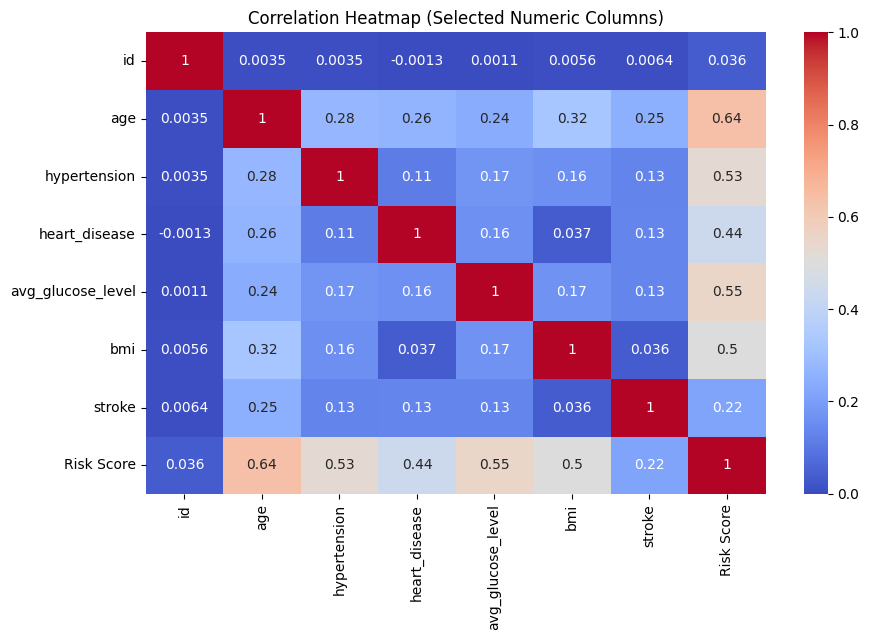

In [27]:
numeric = df.select_dtypes(include=['int64','float64'])
corr_pearson = numeric.corr()  # 默认是pearson

plt.figure(figsize=(10,6))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Selected Numeric Columns)")
plt.show()

In [28]:
df.to_csv("/home/rayan/Downloads/healthh_cleaned.csv", index=False)